Core MLで「１枚の画像から距離マップを推定」する

In [1]:
from coreml.image_recognition import *
from uikit.ui_uiimage_convert import *


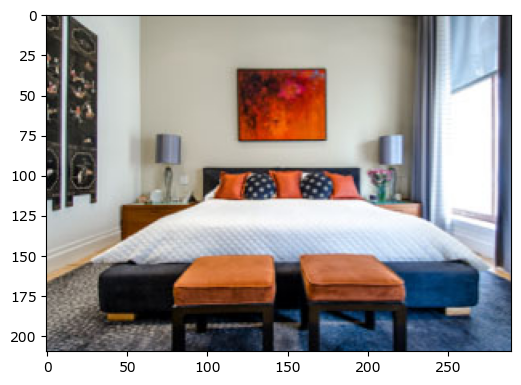

In [2]:
from PIL import Image
import numpy as np
from matplotlib import pylab as plt

pil_img = Image.open("DepthPrediction.jpg")

plt.figure(figsize=[6,6])
plt.imshow(np.array(pil_img), aspect=1.0)

In [ ]:
from coreml.image_recognition import *
#from uikit.ui_uiimage_convert import *

if pil_img:
    scale_image(pil_img, 224)
    vn_model = load_model(
        'https://ml-assets.apple.com/coreml/models/Image/DepthEstimation/FCRN/FCRNFP16.mlmodel',
        'FCRNFP16.mlmodel',
        os.getcwd()+'/models/')
    result =  performRequests_image(vn_model, pil_img)
    if result:
        print(result)
    else:
        print('処理できませんでした')

In [4]:
print(result[0].featureValue().multiArrayValue().shape())
print(result[0].featureValue().multiArrayValue())

print(result[0].featureValue().multiArrayValue().strides()[0].integerValue())

multi_array = result[0].featureValue().multiArrayValue()
[_, height, width] = [i.integerValue() for i in result[0].featureValue().multiArrayValue().shape()]
depth_map = np.empty([height,width])
for h in range(height):
    for w in range(width):
        index = 0
        index = index + 0 * multi_array.strides()[0].integerValue()
        index = index + h * multi_array.strides()[1].integerValue()
        index = index + w * multi_array.strides()[2].integerValue()
        depth_map[h,w] = multi_array.objectAtIndexedSubscript_(index).doubleValue()

(
    1,
    128,
    160
)
Double 1 × 128 × 160 array
20480


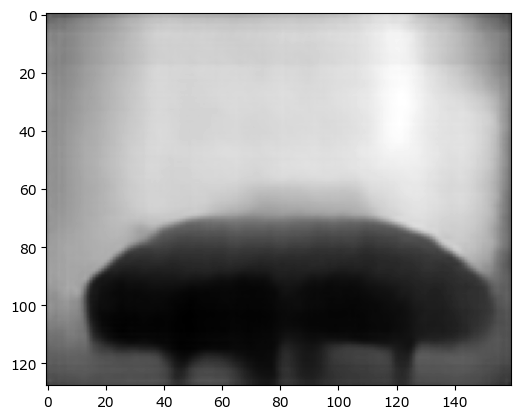

In [5]:
plt.figure(figsize=[6,6])
plt.imshow(depth_map, aspect=1.0, cmap = "gray")

<IPython.core.display.Javascript object>


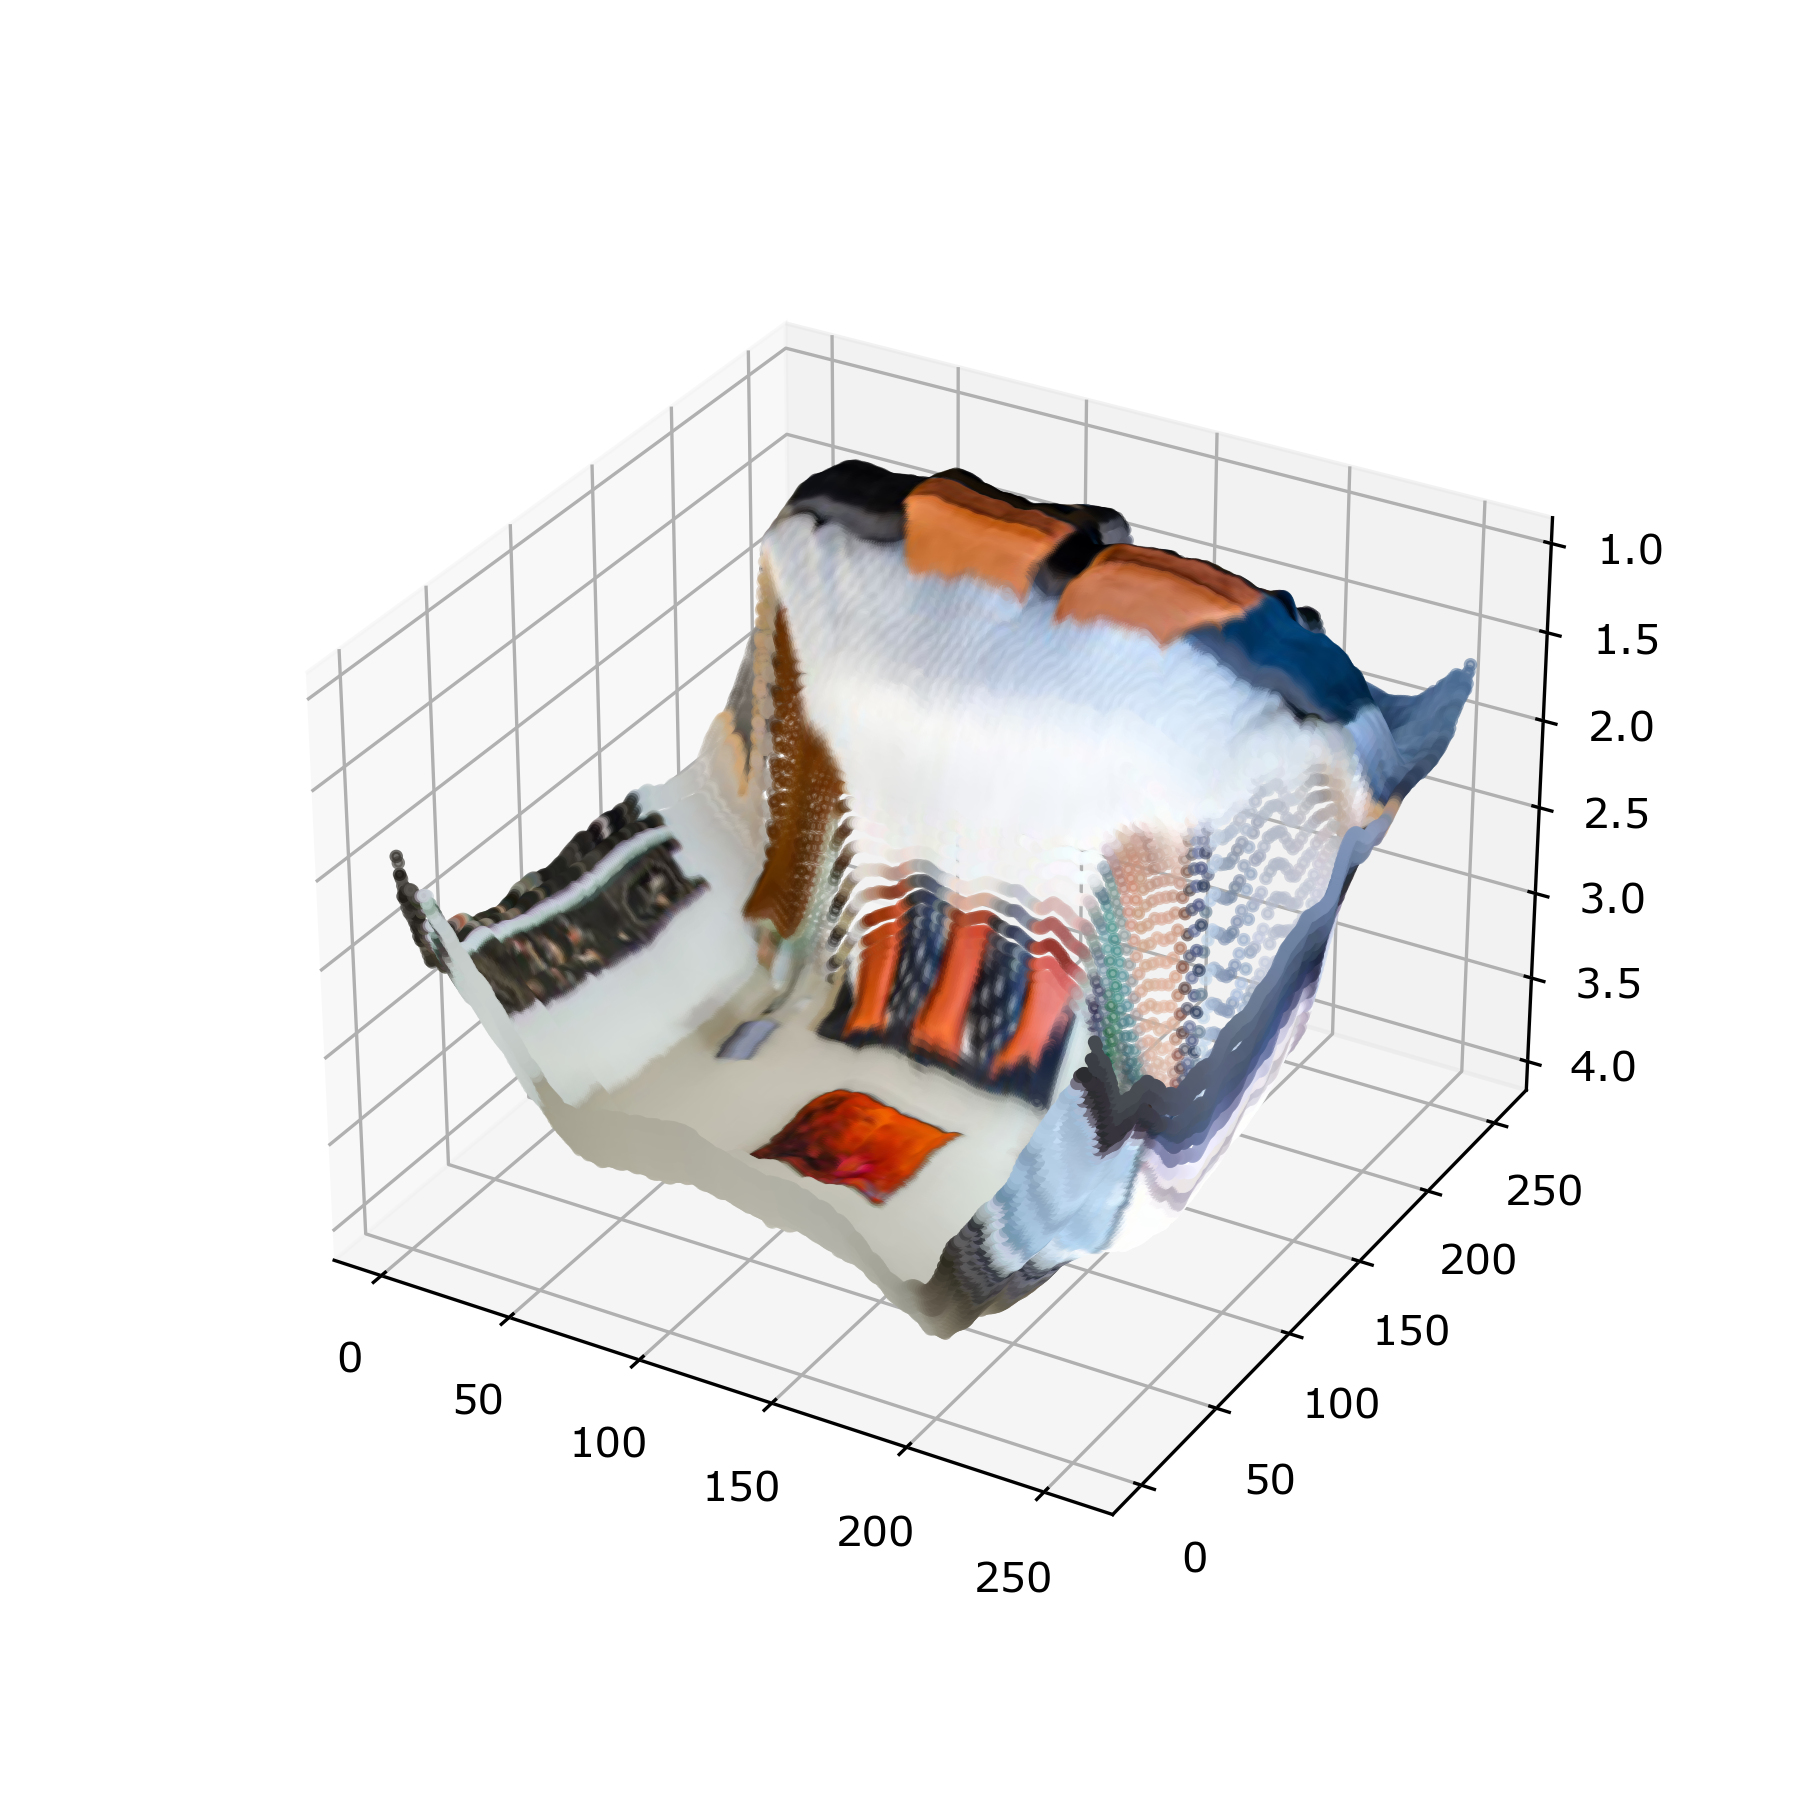

In [6]:
# 散布図を描く例

import matplotlib.pyplot as plt
import numpy as np;  import cv2
from matplotlib.image import imread
from mpl_toolkits.mplot3d import Axes3D
from itertools import chain
%matplotlib notebook

l=256
size=(l,l)

# テクスチャ画像
tex = cv2.resize(np.array(pil_img)/255.0, size)
# 高さ画像
#z = cv2.resize(cv2.cvtColor(imread('depth.png',0), cv2.COLOR_BGR2GRAY), size)
z = cv2.resize(depth_map, size)

x = y = np.linspace(0, l, l)
x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(np.ravel(x), np.ravel(y), np.ravel(z), 
             marker='.',c=np.reshape(tex,(l*l,3))) 
ax.invert_zaxis()
plt.show()